<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Роман! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект.

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные находятся [здесь](https://st.yandex-team.ru/DS-6856).

В файле `train_dataset.csv` собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## Импорты и константы

Импорты:

In [ ]:
# pip install tensorflow

In [ ]:
# pip install pymystem3

In [ ]:
# pip install tensorflow-text

In [ ]:
# pip install keras_nlp

In [ ]:
# pip install sentence_transformers

In [1]:
import pandas as pd
import numpy as np
#from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

from PIL import Image

from pymystem3 import Mystem

import re
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import (Conv2D,
                                     Flatten,
                                     Dense,
                                     AvgPool2D,
                                     GlobalAveragePooling2D,
                                     Dropout,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from sentence_transformers import SentenceTransformer, util

import warnings
from tqdm import tqdm
from tqdm import notebook

2023-06-27 16:23:55.583832: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
warnings.filterwarnings("ignore")

Констатны:

In [3]:
path = '/Users/romanandreev/Documents/DataScience/22 - Project_4/to_upload'
stop_words = ['child', 'children', 'boy', 'girl', 'boys', 'girls', 'newborn', 'baby', 'babies', 'teenager',
              'teen', 'kid', 'teenage', 'infant', 'youngster']
seed = 42

## Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


### Проверка входных данный

Всего для работы было предоставленно 5 датасетов и 2 папки с изображениями. Загрузим данные и прочитаем их:

In [4]:
# uploaded = files.upload()

In [5]:
train_data = pd.read_csv(path + '/train_dataset.csv')
crowd = pd.read_csv(path + '/CrowdAnnotations.tsv', sep='\t', names=['image', 'query_id', 'crowd_rate', 'total_yes', 'total_no'])
expert = pd.read_csv(path + '/ExpertAnnotations.tsv', sep='\t', names=['image', 'query_id', 'score_one', 'score_two', 'score_three'])
test_im = pd.read_csv(path + '/test_images.csv')
test_queries = pd.read_csv(path + '/test_queries.csv', sep='|', index_col=[0])

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:

    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием path, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Я вижу что ты создал константу с путями. Но для загрузки датафреймов никак её не используешь...


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил!
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍, спасибо, сейчас делать перезапуск гораздо проще )) </div>

### Таблица с экспертными оценками

Рассморим оценки экспертов и прведем их к консенсус-оценке.

In [7]:
expert.head()

image                     query_id  score_one  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2          1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2          1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2          1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2          1   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2          1   

   score_two  score_three  
0          1            1  
1          1            2  
2          1            2  
3          2            2  
4          1            2

In [8]:
# функция определения консенсус оценки по большинству

def final_score(data):
    scores = [data['score_one'], data['score_two'], data['score_three']]
    f_score = [x for x in scores if scores.count(x) > 1]
    if len(f_score) > 0:
        return f_score[0]
    else: return np.NaN

In [9]:
expert['final_score'] = expert.apply(final_score, axis=1)

In [10]:
expert.head()

image                     query_id  score_one  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2          1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2          1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2          1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2          1   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2          1   

   score_two  score_three  final_score  
0          1            1          1.0  
1          1            2          1.0  
2          1            2          1.0  
3          2            2          2.0  
4          1            2          1.0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Консенсус-оценка определена в столбце `'final_score'`. В случаях, где эксперты не сошлись в оценке, установили значение `np.NaN`.

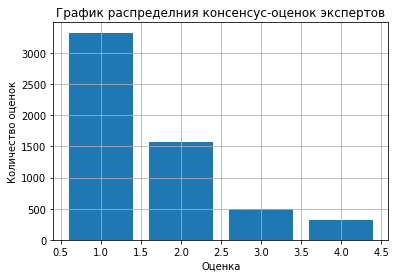

In [11]:
barplot = plt.bar(expert['final_score'].value_counts().index , height=expert['final_score'].value_counts().values)

plt.title('График распределния консенсус-оценок экспертов')
plt.xlabel('Оценка')
plt.ylabel('Количество оценок')


plt.grid()
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Переведем оценки в процентное соотношение, где:
- 1 - 0;
- 2 - .25;
- 3 - .67;
- 4 - 1

In [12]:
# функция нормирования оценки экспертов
def normalize(x):
    return (x-1)/(4-1)

In [13]:
expert['expert_rate'] = expert['final_score'].apply(normalize)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Таблица с краудсорсинговыми оценками

In [14]:
crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       47830 non-null  object 
 1   query_id    47830 non-null  object 
 2   crowd_rate  47830 non-null  float64
 3   total_yes   47830 non-null  int64  
 4   total_no    47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [15]:
crowd.tail()

image                    query_id  crowd_rate  \
47825  997722733_0cb5439472.jpg  543007912_23fc735b99.jpg#2    0.000000   
47826  997722733_0cb5439472.jpg  544576742_283b65fa0d.jpg#2    0.333333   
47827  997722733_0cb5439472.jpg  872622575_ba1d3632cc.jpg#2    1.000000   
47828  997722733_0cb5439472.jpg  888425986_e4b6c12324.jpg#2    0.000000   
47829  997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2    0.666667   

       total_yes  total_no  
47825          0         3  
47826          1         2  
47827          3         0  
47828          0         3  
47829          2         1

Проверим расчет доли соответствия описания изображению:

In [16]:
crowd['total_count'] = crowd['total_yes'] + crowd['total_no']
crowd['check'] = round((crowd['total_yes'] / crowd['total_count'] - crowd['crowd_rate']), 2)

In [17]:
crowd['check'].value_counts()

0.0    47830
Name: check, dtype: int64

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Доля рассчитана верно.

### Объединение оценок

Объединим оценки экспертов и краудосриснга в одну таблицу.

In [18]:
all_scores = expert.merge(crowd, how='outer', left_on=['image', 'query_id'], right_on = ['image', 'query_id'])

In [19]:
all_scores = all_scores.dropna(subset=['expert_rate', 'crowd_rate'], how='all').reset_index(drop=True)

In [20]:
all_scores[['expert_rate', 'crowd_rate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51268 entries, 0 to 51267
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   expert_rate  5696 non-null   float64
 1   crowd_rate   47830 non-null  float64
dtypes: float64(2)
memory usage: 801.2 KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, стараешься выжать из данных максимум </div>

Оценок экспертов меньше в ~6 раз, чем краудсорсинговых оценок. Чтобы максимально уведичить количество оценок запросов, посчитаем общую оценку по следующей формуле:
- если есть оценка эксперта и нет краудсорсинга: принимаем оценку эксперта финальной;
- если есть оценка краудсорсинга и нет эксперта: принимаем оценку краудсорсинга финальной;
- если есть обе оценки, считаем по формуле общую оценку: `P(expert)*0.6 + P(crowd)*0.4`;
- если нет обеих оценок: удаляем строку.

In [21]:
# функция расчета общей оценки экспертов и краудсорсинга
def sum_score(data):
    if np.isnan(data['expert_rate']):
        x = data['crowd_rate']
    elif np.isnan(data['crowd_rate']):
        x = data['expert_rate']
    else:
        x = data['expert_rate'] * .6 + data['crowd_rate'] * .4
    return x

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [22]:
all_scores['rate'] = all_scores.apply(sum_score, axis=1)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [23]:
data = all_scores[['image', 'query_id', 'rate']]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51268 entries, 0 to 51267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     51268 non-null  object 
 1   query_id  51268 non-null  object 
 2   rate      51268 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [25]:
data['rate'].value_counts()

0.000000    43708
0.333333     2757
1.000000     1292
0.666667     1207
0.200000      805
0.333333      656
0.400000      179
0.533333      142
0.250000       91
0.333333       79
0.666667       73
0.866667       62
0.666667       53
0.800000       37
0.500000       25
0.200000       20
0.466667       18
0.733333       18
0.600000       13
0.400000        8
0.750000        7
0.133333        4
0.166667        3
0.280000        2
0.720000        2
0.700000        2
0.300000        2
0.560000        2
0.100000        1
Name: rate, dtype: int64

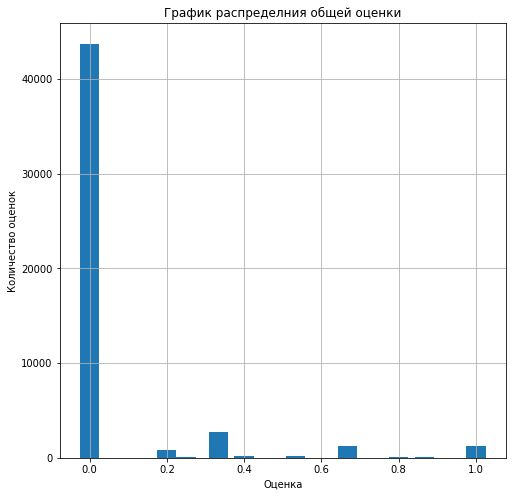

In [26]:
figure(figsize=(8, 8))

barplot = plt.bar(data['rate'].value_counts().index , height=data['rate'].value_counts().values, width=.05)

plt.title('График распределния общей оценки')
plt.xlabel('Оценка')
plt.ylabel('Количество оценок')
#plt.bar_label(barplot, labels=data['rate'].value_counts().values)

plt.grid()
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Вывод

Данные с оценками экспертов и краудсорсинга не требуют коррекции и готовы для работы.

Были рассчитаны вероятности соответствия текста и изображения экспертных оценок. Экспертные оценки и краудсорсинговые были объеденины в один датасет и рассчитана общая оценка по следующей формуле:
- если есть оценка эксперта и нет краудсорсинга: принимаем оценку эксперта финальной;
- если есть оценка краудсорсинга и нет эксперта: принимаем оценку краудсорсинга финальной;
- если есть обе оценки, считаем по формуле общую оценку: `P(expert)*0.6 + P(crowd)*0.4`;
- если нет обеих оценок: удаляем строку.

Таким образом нам удалось расширить датасет вероятностей соответствия картинки и фразы.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

### Идентификация запрещенных изображений

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [28]:
train_data['query_text'] = train_data['query_text'].str.lower()

In [29]:
# функция определения стоп-слов
def filter_child(data):
    for word in stop_words:
        if word in data['query_text']:
            return 1
    return 0

In [30]:
train_data['restrictive'] = train_data.apply(filter_child, axis=1)

In [31]:
train_data['restrictive'].value_counts()

0    4267
1    1555
Name: restrictive, dtype: int64

**Вывод:**

1555 запросов содержат слова, которые описывают детей до 16 лет. Далее идентифицируем фотографии.

In [32]:
def short_text(text):
    return text[:-2]

In [33]:
stop_images = train_data[train_data['restrictive'] == 1]['query_id'].apply(short_text).unique()

In [34]:
len(stop_images)

289

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, нашел список "плохоих" изображений,  причем сделал это самым красивым и "точным" способом.</div>

**Вывод:**

289 фотографии из 1000 в обучающей выборке относятся к запрещенному контенту. Удалим их из обучащей выборки.

In [35]:
train_data_clear = train_data.query('image not in @stop_images')

In [36]:
train_data_clear = train_data_clear[['image', 'query_id', 'query_text']].reset_index(drop=True)

In [37]:
train_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       4096 non-null   object
 1   query_id    4096 non-null   object
 2   query_text  4096 non-null   object
dtypes: object(3)
memory usage: 96.1+ KB


### Визуальный конроль

Проведем визульный конроль результата чистки изображений:

In [38]:
# fig = plt.figure(figsize=(15, 15))

# check_images = list(train_data_clear['image'].sample(32))

# for i in range(32):
#     fig.add_subplot(8, 4, i+1)
#     image = Image.open(path + '/train_images/' + check_images[i])
#     plt.imshow(image)
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()

**Вывод:**

По итогам визуального контроля в выдаче не содержится ни одного изображения с детьми до 16 лет. Считаем, что чистка датасета проведена успешно.

На следующем этапе объединим очищенный датасет с изображениями и оценками.

### Объединение датасетов

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
А вот здесь у тебя наинается путаница. Объединение датафреймов `train_data_clear` и  `data` через outer взвращает нас к тому, что все детские изображения останутся в объединенном датафрейме.

Посоветую тебе изменить подход.
    
  - Признать, что в датафрейме `data` хранятся записи, на которых мы в дальнейшем будем учить наши модели
  - Почистить этот датафрейм от детских фотографий. Через query как ты это только что делал
  
    
Также сразу дам тебе совет как добавить колонку с расшифровкой текстов
  - В датафрейме train_data найти уникальные пары `'query_id'`, `'query_text'`, их должно быть чуть меньше 1000.
  - Приджойнить описания. Берем `data` и делаем left_join `'query_text'` по ключу `'query_id'`. После этого удаляем пропуски. Как альтернатива можно попробовать inner (интуиция говорит что результаты должны совпасть, но нужно првоерить)
    
    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Да, здесь поднапутал... Спасибо, поправил.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Очистим датасет с оценками от фотографий с "запрещенным" контентом:

In [39]:
data_clear = data.query('image not in @stop_images')

In [40]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36660 entries, 0 to 51267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     36660 non-null  object 
 1   query_id  36660 non-null  object 
 2   rate      36660 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


Найдено 14608 записей, с "запрещенными" фотографиями. Датасет с оценками очищен.

Объединим датасет с обучающей выборкой изображений с объединенным датасетом оценок.

In [41]:
train_data_clear_unique = train_data_clear[['query_id', 'query_text']].drop_duplicates().reset_index(drop=True)

In [42]:
train_data_clear_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    941 non-null    object
 1   query_text  941 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [43]:
train_data_score = data_clear.merge(train_data_clear_unique, on=['query_id'], how='left')
train_data_score = train_data_score.dropna().reset_index(drop=True)
train_data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34791 entries, 0 to 34790
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       34791 non-null  object 
 1   query_id    34791 non-null  object 
 2   rate        34791 non-null  float64
 3   query_text  34791 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [44]:
# train_data_score = data.merge(train_data_clear, on=['image', 'query_id'], how='outer')

In [45]:
# train_data_score.info()

In [46]:
# В результате объединения датасетов, большая часть текстовых запросов осталась не заполненной.
# Заполним пропущенные ячейки с помощью поиска текста запроса по идентификатору запроса:

In [47]:
# # Функция заполнения пропущенных текстов запросов
# def fillin(data):
#     if pd.isnull(data['query_text']):
#         txt = train_data[train_data['query_id'] == data['query_id']]['query_text']
#     else: txt = data['query_text']
#     return txt

In [48]:
# train_data_score['query_text'] = train_data_score.apply(fillin, axis=1)

In [49]:
# train_data_score.isna().sum()

In [50]:
# Пропущенные текст запроса заполнен.

# Остались пропуски в оценках соответствия запроса и фотографии. В данном случае у нас нет дополнительных данных для заполнения.
# Удалим строки с пропущенными оценками:

In [51]:
# train_data_score = train_data_score.dropna(subset=['rate']).reset_index(drop=True)

In [52]:
# train_data_score.isna().sum()

**Вывод:**

Все пропуски хаполнены и удалены. Данные объединены корректно.

### Вывод

Всего было идентифицировано:
- 1555 запросов, содержащих слова, которые описывают детей до 16 лет;
- 289 фотографии из 1000 в обучающей выборке относятся к запрещенному контенту.


Фотографии с детьми удалены из датасета. Также в обучающий датасет было добавлено поле с вероятностью соответствия описания.

## Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

### Загрузчик файлов, ResNet50

Выведем образцы изображений для визуального контроля работы

In [55]:
train_data_score_uni = train_data_score.drop_duplicates(subset=['image']).reset_index(drop=True)

In [50]:
train_data_score_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       711 non-null    object 
 1   query_id    711 non-null    object 
 2   rate        711 non-null    float64
 3   query_text  711 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.3+ KB


In [ ]:
# функция загрузки файлов для обучения
def load_train(path):
    datagen = ImageDataGenerator(rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=train_data_score,
        directory=path + '/train_images/',
        x_col='image',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=seed)

    return train_gen_flow

In [ ]:
train_datagen = load_train(path)

Found 34791 validated image filenames.


In [ ]:
X, y = next(train_datagen)

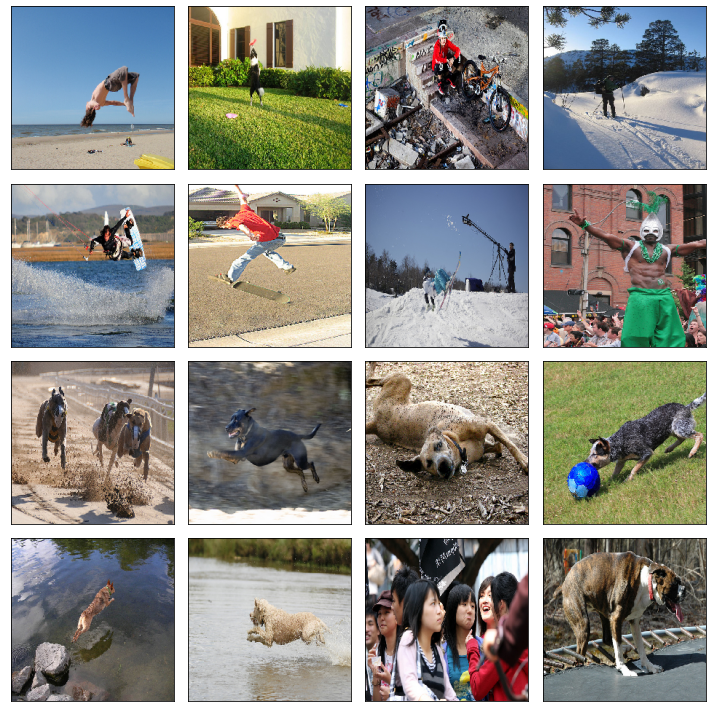

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(X[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Загрузчик файлов создан и работает корректно.
Инициализируем модель ResNet-50 для создания эмбедингов:

In [ ]:
def create_model(input_shape):
    optimizer = Adam(lr=0.0001)

    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

In [ ]:
%%time

image_embad = create_model(input_shape=(224, 224, 3)).predict(load_train(path))

Found 34791 validated image filenames.


2023-06-26 17:09:46.156253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2175/2175 [==============================] - 2816s 1s/step
CPU times: user 3h 5min 40s, sys: 1h 7min 42s, total: 4h 13min 22s
Wall time: 47min


In [ ]:
image_embad

array([[0.0000000e+00, 0.0000000e+00, 1.0514989e-04, ..., 1.9596531e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.8599723e-04, ..., 2.1757412e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0151396e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.2960374e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.2158549e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.4623773e-04, ..., 1.9712551e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но есть нюанс. У тебя почти 50_К объектов. Рассчет эмбеддингов на нейронке - дорогая и долгая операция.  При этом количество уникальных объектов не велико, всего 1000. Т.е. можно рассчитать эмбеддинги для уникальных фотографий а затем приджойнить их в обучающий датасет.
    
Запустил этот код на GPU в Google Colab... Расчет эмбеддинов занял около 6 минут (при этом я использую самую дешевую карточку). У тебя он похоже считался больше часа на CPU.
        
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Согласен полностью, что изображений менее 1000, а эмбеддинги я создаю много рах повторно. Но как мне приджоийнить созданные эмбеддинги к датасету, по какому ключу? Подскажи, пожалуйста.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> так через image, других вариантов нет.... </div>

### Вывод

Был создан загрузчик изображений и построена модель `ResNet50` без полносвязного слоя, чтобы не были посчитаны итоговые значения.

Созданы эмбединги изображений.

## Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [ ]:
lemmatizer = WordNetLemmatizer()

# функция лемматизирования и очистки
def lemmitize(text):
    text = re.sub(r"[^a-zA-Z ]", ' ', str(text))
    text = nltk.word_tokenize(text, language = 'english') # токенизируем слова
    text = [lemmatizer.lemmatize(word) for word in text] # лемматирзируем слова
    return text

In [ ]:
%%time

train_data_score['lemm_text'] = train_data_score['query_text'].apply(lemmitize)

CPU times: user 5.72 s, sys: 515 ms, total: 6.23 s
Wall time: 6.31 s


In [ ]:
# приведем к Юникоду:
corpus_train = train_data_score['lemm_text']
corpus_train = corpus_train.astype('U')
corpus_train.shape

(34791,)

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

cnt_tf_idf = TfidfVectorizer(stop_words=stopwords)
cnt_tf_idf.fit(corpus_train)

tf_idf_train = cnt_tf_idf.transform(corpus_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romanandreev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(tf_idf_train.shape)

(34791, 1267)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Подскажи, пожалуйста, есть ли BERT в библиотеке Keras?
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, во первых в есть реализация BERT в библиотеке Keras (было бы странно, ведь BERT это модель от Google, а TF разрабатывается ими, а Keras это выскоуровневый API поверх TF).  

https://keras.io/api/keras_nlp/models/bert/bert_backbone/
    
Но если не хочешь разбираться с тем, как работать с этими слоями, можно поступить проще: В transformers есть версии основных моделей как в версии для pytorch, так и в версии для TF. Поэтому мы можем просто использовать TFBertModel вместо BertModel и адаптировать код векторизации из спринта по текстам.
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Спасибо! Так как у меня уже время сдачи проекта, то я попробую сам сделать с BERT-ом. Попрошу только проверить код:
    
```python

import keras_nlp

# загрузка трансформера Bert и предпроцессора
bert = keras_nlp.models.BertBackbone.from_preset('bert_base_en')
preprocessor = keras_nlp.models.BertPreprocessor.from_preset('bert_base_en')

text_emb = []
text = list(train_data_score['query_text'])
tokenized = preprocessor(text)
batch_size=32


for i in tqdm(range(tokenized['token_ids'].shape[0] // batch_size + 1)):

    tokens = tokenized['token_ids'][batch_size*i:batch_size*(i+1)]
    token_types = tokenized['segment_ids'][batch_size*i:batch_size*(i+1)]
    mask = tokenized['padding_mask'][batch_size*i:batch_size*(i+1)]

    batch = {'token_ids' : tokens,
            'segment_ids' : token_types,
            'padding_mask' : mask}

    batch_emb = bert.predict(batch, verbose=0)

    text_emb.append(batch_emb['pooled_output'])

text_emb = np.concatenate(text_emb)
```
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b>
    
К сожалению невозможно быть экспертом по всем библиотекам (тем более что они постоянно обновляются). И лучший критерий это практика. Чем хороши нейонки, как правило если работает, значит использовано верно. Важно также проверить выходные размерности.
    
Если не секрет, а почему ты решил не использовать стандартный подход, как в спринте по текстам, просто с заменой модели?    
    
P.S. Сделал запуск, с размерностями все ОК, явных проблем не вижу....
    
    
Только что-то долго эти эмбеддинги генерятся... С оптимизацией не возился, но уверен, что через transformers вышло бы сильно  быстрее (тем более что у нас короткие тексты), а вычислительная сложность в трансформерах пропорциональна квадрату длинны текста в токенах.
    
    
</div>

In [ ]:
# import keras_nlp

In [ ]:
# # загрузка трансформера Bert и предпроцессора
# bert = keras_nlp.models.BertBackbone.from_preset('bert_base_en')

In [ ]:
# preprocessor = keras_nlp.models.BertPreprocessor.from_preset('bert_base_en')

In [ ]:
# text_emb = []
# text = list(train_data_score['query_text'])
# tokenized = preprocessor(text)
# batch_size=32


# for i in tqdm(range(tokenized['token_ids'].shape[0] // batch_size + 1)):

#     tokens = tokenized['token_ids'][batch_size*i:batch_size*(i+1)]
#     token_types = tokenized['segment_ids'][batch_size*i:batch_size*(i+1)]
#     mask = tokenized['padding_mask'][batch_size*i:batch_size*(i+1)]

#     batch = {'token_ids' : tokens,
#             'segment_ids' : token_types,
#             'padding_mask' : mask}

#     batch_emb = bert.predict(batch, verbose=0)

#     text_emb.append(batch_emb['pooled_output'])

# text_emb = np.concatenate(text_emb)


## Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [ ]:
print(tf_idf_train.shape)
print(image_embad.shape)

(34791, 1267)
(34791, 2048)


In [ ]:
X = np.concatenate((image_embad, tf_idf_train.toarray()), axis=1)
X.shape

(34791, 3315)

Признаки для обучения модели готовы. Итоговая размерность `X = (34791, 3315)`.

Выделим таргет в отдельный сет данных:

In [ ]:
y = train_data_score['rate']
y.shape

(34791,)

**Вывод:**

Признаки и целевой признак подготовлены для обучения модели. Итоговые размерности:
- `X = (34791, 3315)`;
- `y = (34791,)`.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 Молодец, что работает с numpy, не пытаясь использовать датафреймы. </div>

## Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

### Разделим данные на обучающие и тестовые выборки

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=seed)

train_indices, test_indices = next(gss.split(X=X, y=y, groups=train_data_score['image']))

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [ ]:
print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape,
      sep='\n')

(24312, 3315)
(24312,)
(10479, 3315)
(10479,)


**Вывод:** выборки для обчуения модели и теста созданы.

Перед обучением моделей, определим задачу и выберем метрику качества.



### Выбор метрики

В данной задаче можно воспользоваться метриками `MAE` или `RMSE`. При чем метрика `RMSE` более восприимчива к выборосам, поэтому она будет уместнее в случае, когда в задаче имются значительные отклонения истинных значений от предсказанных.

### LinearRegression

In [ ]:
lr = LinearRegression(n_jobs=-1)

In [ ]:
# params= {
#     'fit_intercept': [True],
#     'copy_X': [True],
#     'n_jobs': [None],
#     'positive': [False]
# }

# grid_lr = GridSearchCV(estimator=lr, param_grid=params, cv=3, scoring='neg_root_mean_squared_error')

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
predictions = lr.predict(X_test)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Я вижу что ты уже выбрал метрику mse, поэтому просто напиши обоснование для своего выбора.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавил обоснование.

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
print(mean_squared_error(y_test, predictions, squared=False))

0.21616129005343268


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да уж.. Очевидно проблема в сильном переобучении линейной регрессии. Советую попробовать любого её родственика с l1/l2 регуляризацией (Ridge/Lasso)</div>

In [ ]:
trg = pd.DataFrame(y_test.reset_index(drop=True))
prd = pd.DataFrame({'predictions': predictions})
qst = pd.concat([trg, prd], axis=1)

qst

rate  predictions
0      0.000000     0.022186
1      0.000000    -0.030479
2      0.533333     0.253876
3      0.333333     0.104591
4      0.200000     0.035542
...         ...          ...
10474  0.666667     0.035355
10475  0.000000     0.126881
10476  0.000000     0.068157
10477  0.000000     0.000214
10478  0.000000    -0.015377

[10479 rows x 2 columns]

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Подскажи, пожалуйста, по какой причине RMSE выглядит неправдоподобно? Если сравнить предсказания с таргетов, то порядок равный...

Так же странно, что в предсказаниях присутствует отрицательный RMSE.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Нужно исследовать датафрейм подробнее, возможно где-то есть прям аномально большие значения. Что касается отрицательных - так у нас же не логистическая, а линейная регрессия. Она просто нашла себе какие-то коэффициенты и пытается их применять.
    
Провел небольшое исследование. Видно, что кое-где модель чудовищно ошибается
    
    
![image.png](attachment:image.png)    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Проблема с линейной регерессии ушла после того, как сократилось кол-во строк в файле обучения.
  
    
</div>

### NeuralNetwork

In [ ]:
optimizer = Adam(lr=0.0001)

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(2048, input_shape=(X_train.shape[1],), activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(1, activation='relu'))

model_nn.compile(optimizer=optimizer,
                 loss='mean_squared_error',
                 metrics=[RootMeanSquaredError()])

model_nn.build()

model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6791168   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 7,316,993
Trainable params: 7,316,481
Non-trainable params: 512
__________________________________________

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 512...64...64... 16....8

Ты используешь количество нейронов во входном слое равное 3514, то похоже на попытку сделать матрицу квадратной. Но зачем? Это явно лишнее... Зато это делает нашу модель очень тяжелой.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Кстати, модель без регуляризации и может может переобучаться. Я бы советовал попробовать добавить слои прореживания.</div>

In [ ]:
model_nn.fit(X_train,
             y_train,
             validation_data=(X_test, y_test),
             batch_size=16,
             epochs=10,
             verbose=2,
             shuffle=True)

Epoch 1/10
1520/1520 - 111s - loss: 0.0784 - root_mean_squared_error: 0.2800 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 111s/epoch - 73ms/step
Epoch 2/10
1520/1520 - 110s - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 110s/epoch - 73ms/step
Epoch 3/10
1520/1520 - 110s - loss: 0.0565 - root_mean_squared_error: 0.2377 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 110s/epoch - 72ms/step
Epoch 4/10
1520/1520 - 106s - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 106s/epoch - 70ms/step
Epoch 5/10
1520/1520 - 107s - loss: 0.0565 - root_mean_squared_error: 0.2377 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 107s/epoch - 71ms/step
Epoch 6/10
1520/1520 - 107s - loss: 0.0565 - root_mean_squared_error: 0.2377 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311 - 107s/epoch - 70ms/step
Epoch 7/10
1520/1520 - 106s - loss: 0.0565 - r

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Попробовал добавлять/удалять:
- слои,
- прореживания,
- нормализацию,
- изменял активацию и шаг оптимизатора,
- кол-во батчей.

Модель не хочет учиться и всегда выдает `RMSE = 0.2311` на валидационной выборке... Подскажи, пожалуйста, что с ней делать? Как ее можно улучшить?
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> Тут скорее всего дело не в модели. Если есть взаимосвязь между признаками и таргетом, то любая модель худо-бедно её нащупает.  Здесь только менять подход к подготовке признаков или даже архитектуру проекта. 

    
Иногда помогает сделать архитетуру послжонее (добавить побольше слоев, чтобы модель могла начать находить более сложные паттерны), уменьшать lr и учить не 10 эпох, а 100...
    
Но если модель не может найти взаимосвязь между признаками и таргетом, то при таком подходе она может их "придумать" на обучющей выборке, но на валидации они могут не подтвердиться.
    
    
Что из себя представляет вектор после tf-idf? это очень много нулей и чуть чуть значений отличных от нуля (по количеству слов). Модели сложно найти взаимосвязи. Чуть лучше будет ситуация если использовать эмбединги после BERT, но и здесь модели будет очень сложно.    
</div>

## Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

### Векторизация тестовых изображений

In [53]:
test_images = pd.DataFrame(test_queries['image'].unique(), columns=['image'])

In [54]:
test_images

image
0   1177994172_10d143cb8d.jpg
1   1232148178_4f45cc3284.jpg
2    123997871_6a9ca987b1.jpg
3   1319634306_816f21677f.jpg
4   1429546659_44cb09cbe2.jpg
..                        ...
95   862177617_c2c0581075.jpg
96   957682378_46c3b07bcd.jpg
97   973827791_467d83986e.jpg
98   989754491_7e53fb4586.jpg
99   989851184_9ef368e520.jpg

[100 rows x 1 columns]

In [ ]:
# функция загрузки файлов для теста
def load_test(path):
    datagen = ImageDataGenerator(rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=test_images,
        directory=path + '/test_images/',
        x_col='image',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=seed)

    return test_gen_flow

In [ ]:
test_datagen = load_test(path)

Found 100 validated image filenames.


In [ ]:
X, y = next(train_datagen)

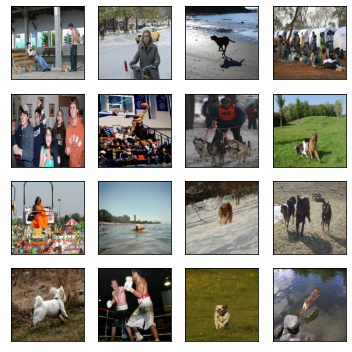

In [ ]:
fig = plt.figure(figsize=(5, 5))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(X[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [ ]:
%%time

test_image_embad = create_model(input_shape=(224, 224, 3)).predict(load_test(path))

Found 100 validated image filenames.


2023-06-26 18:22:33.414210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 6s 801ms/step
CPU times: user 27.1 s, sys: 9.44 s, total: 36.6 s
Wall time: 8.43 s


In [ ]:
test_image_embad.shape

(100, 2048)

**Вывод:** эмбеддинги тестовых изображений созданы. Вышло 100 строк и 2048 полей.

### Подготовка признаков для модели

Подготовим признаки для модели. Для этого векторизуем текс, проверим на стоп-слова и объединим вектор текстового запроса с вектором изображения, если стоп-слова не найдены.

In [ ]:
# # функция обработки текста запроса и создания признаков

# def get_feature(data):

#     # лемматизация текстовых запросов
#     data['query_text'] = data['query_text'].str.lower()
#     data['lemmed'] = data['query_text'].apply(lemmitize)


#     # приведем к Юникоду
#     corpus_tst = data['lemmed']
#     corpus_tst = corpus_tst.astype('U')


#     # проверка на стоп-слова
#     cntr = 0
#     for word in stop_words:
#         if word in data['lemmed'].values[0]:
#             cntr += 1
#     if cntr > 0:
#         attaintion = 'This image is unavailable in your country in compliance with local laws.'
#         return attaintion


#     # токенизация текстовых запросов
#     tf_idf_tst = cnt_tf_idf.transform(corpus_tst)


#     # объединение эмбеддингов картинок и текста
#     features = np.concatenate((test_image_embad[0].reshape(1, -1), tf_idf_tst.toarray()), axis=1)

#     for i in range(1, len(test_image_embad)):
#         f = np.concatenate((test_image_embad[i].reshape(1, -1), tf_idf_tst.toarray()), axis=1)
#         features = np.concatenate((features, f), axis=0)

#     return features

Создадим массив из 10 случайно выбранных запросов.

In [54]:
n = 10 # кол-во запросов для проверки
texts = list(test_queries.sample(n)['query_text'].values)
print(*texts, sep='\n')

A black dog jumps up to a man 's uplifted hand .
Middle school aged kids are showing their school spirit at a pep ralley .
Women play lacrosse .
A dog fetching a stick .
Three people stand outside a fast food joint with their drinks .
A man is jumping off a rock into a pool of water while three others watch .
A woman and two children pose for a picture under some rocks .
Two dogs are standing next to each other , and the white dog has a stick in its mouth .
Young children play in the sprinkler .
The furry black and white dog is running through a shallow pool .


Проведем тестирование модели на тестовых данных:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по тексту для одного изображения.

  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.    
    
.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Переписал логику функции. Теперь получает текстовый запрос и выдает результат. Однако, не все проверочные изображения выводятся. В чем может быть неточность в коде?

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b>
    
    
Вот здесь я не понял твой вопрос. Если у тебя что-то не выводится, пожалуйста покажи этот кейс отдельно. Т.е. в отдельной ячейке сделай вывод изображений под конкретный запрос и покажи какой у тебя баг.
    
    
Что я вижу сейчас: изображения по запросу выводятся, отрабатывается контроль юридических ограничений. Да, все изображения одинаковые. Но это связано с тем ,что модель "вынужеднно беспомощная" и приучена не обращать внимание на тексты.
    
Если ты возьмешь необученную модель, то окажется что функция предсказывает разные картинки по разному запросу (я проверил, здесь все ОК.
    
Можно оптимизировать код если после получения предсказания использовать np.argmax для поиска изображений с максимальной степенью соответствия. Так ты узнаешь индекс, по которому сможешьвзятьизображение из  test_images['image']  
    
</div>

In [ ]:
# функция обработки текста запроса, создания признаков и вывода релевантных изображений

def get_picture(text):

    # лемматизация текстовых запросов
    text = text.lower()
    lemmed = lemmitize(text)


    # проверка на стоп-слова
    cntr = 0
    for word in stop_words:
        if word in lemmed:
            cntr += 1
    if cntr > 0:
        attaintion = 'This image is unavailable in your country in compliance with local laws.'
        print(f'Your request: {text}')
        print(f'\033[1m{attaintion}\033[0m')
        print()
        return None
    else:

        # токенизация текстовых запросов
        tf_idf_tst = cnt_tf_idf.transform(lemmed)


        # объединение эмбеддингов картинок и текста
        features = np.concatenate((test_image_embad,
                                   np.resize(tf_idf_tst.toarray(), (test_image_embad.shape[0], tf_idf_tst.shape[1]))),
                                   axis=1)

        # предсказание
        predictions = model_nn.predict(features)

        a = pd.Series([text for i in range(100)], name='request') # создаем поле с запросом
        preds = pd.DataFrame(predictions, columns=['score']) # создаем поле с предсказаниеями
        preds = pd.concat((preds, test_images['image'], a), axis=1) # объединяем поля с запросом, оценками и названиями картинок

        print()
        print()
        print(f'Your request: {text}')


        # выводим картинки на экран
        fig = plt.figure(figsize=(15, 6))
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['axes.linewidth'] = 0

        check_images = preds.sort_values(by='score', ascending=False).head()

        for i in range(len(check_images)):
            fig.add_subplot(1, 6, i+1)
            image = Image.open(path + '/test_images/' + check_images['image'].values[i])
            plt.title(check_images['score'].values[i])
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        if text in list(test_queries['query_text'].values): # добавляем оригинальную картинку
            plt.rcParams['axes.edgecolor'] = 'green'
            plt.rcParams['axes.linewidth'] = 10
            fig.add_subplot(1, 6, 6)
            img = Image.open(path + '/test_images/' + test_queries[test_queries['query_text'] == text]['image'].values[0])
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
        plt.show()

    return None

Your request: a child in a fuzzy blue hat on a tricycle .
This image is unavailable in your country in compliance with local laws.

4/4 [==============================] - 0s 7ms/step


Your request: a man sits on the gravel by an ocean .


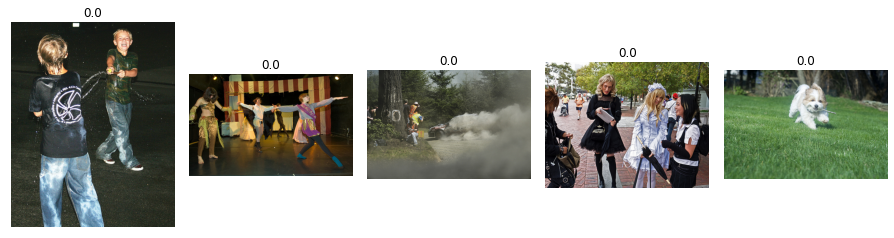

Your request: two kids playing with a dog .
This image is unavailable in your country in compliance with local laws.

4/4 [==============================] - 0s 7ms/step


Your request: a black and white dog biting onto a chunk of ice .


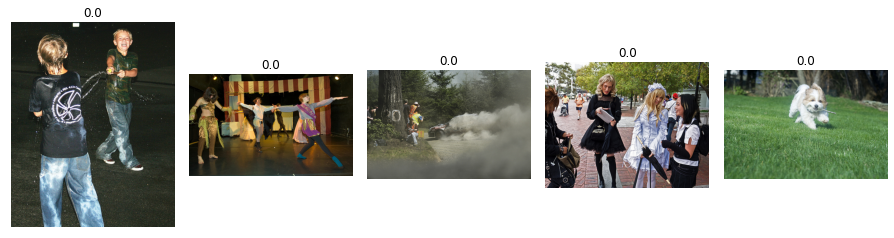

4/4 [==============================] - 0s 6ms/step


Your request: a man riding a wakeboard on a lake


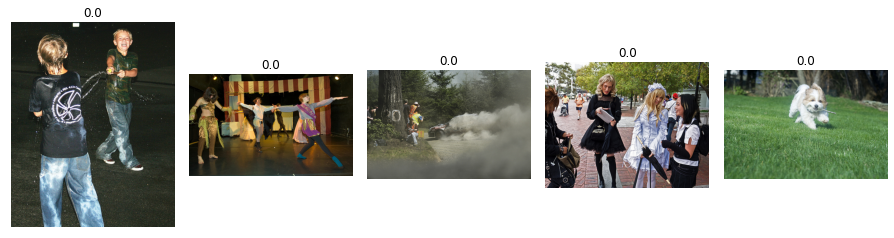

4/4 [==============================] - 0s 8ms/step


Your request: a blue bird flying over water .


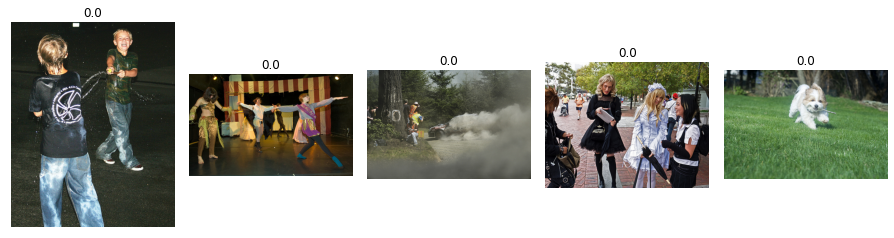

4/4 [==============================] - 0s 6ms/step


Your request: a brown dog with a black collar stands next to a bush .


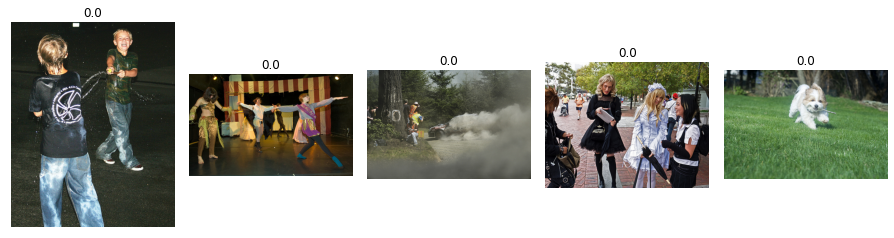

4/4 [==============================] - 0s 7ms/step


Your request: little dog is jumping up to catch a red ball in its mouth .


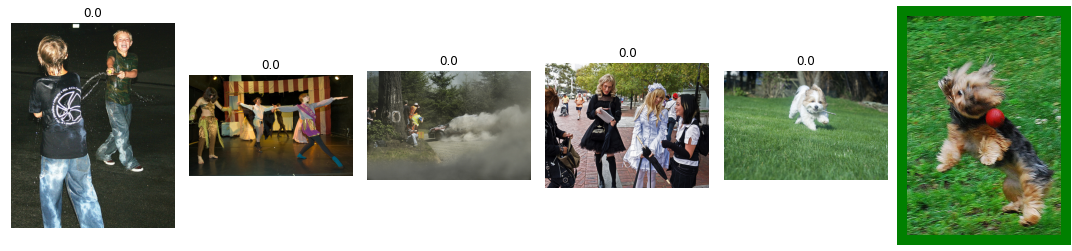

Your request: a child sits in the woods looking up with binoculars .
This image is unavailable in your country in compliance with local laws.

4/4 [==============================] - 0s 6ms/step


Your request: a black dog holding a weight in its mouth stands next to a person .


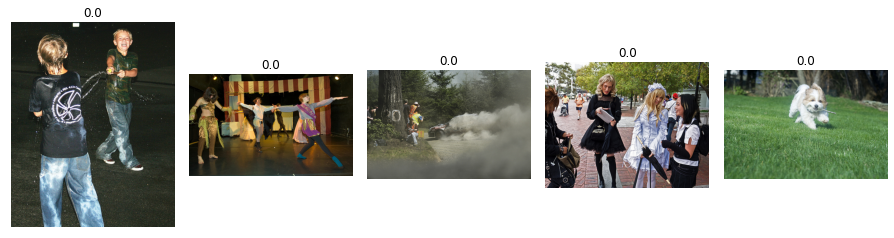

In [ ]:
for txt in texts:
    get_picture(txt)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Небольшая формальность - пожалуйста добавь в код функции инфереса, чтобы она кроме изображения и текста  выводила найденную меру близости.</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Модель выдает один и тот же результат... Подскажи, пожалуйста, в чем может быть ошибка?
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. И причин тут несколько - мало данных, не очень правильный подход. На мой взгляд более перспективным было бы привести ембеддинги изображений и текстов к одной размерности в одно пространство (через обучаемые слои) и в качестве меры близости использовать косинусное расстояние.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
В итоге у меня тот же самый результат. Что очень странно, так как в какой-то момент модель начала работать, а не лениться и выдавала разные картинки под каждый запрос. После перезагрузки Kernal модель снова "сломалась". Пробовал перезашружать Kernal,разные параметры модели, но результата нет.
    
Так же не загружается модель OpenAI CLIP Model, просто висит ячейка уже около 30 минут и ничего не происходит... Как это можно починить?
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b>В обучении нейронок к сожалению много рандома... Возможно в какой-то момент тебе повезло и нейронка смогла нащупать взаимосвязи...  В таких случаях стоит сохранить веса (локально или на гугл-диск).
    
 В чем у тебя проблема с загрузкой модели CLIP не подскажу. У меня все работает. К сожалению я даже не знаю на чем ты работаешь, чтобы давать советы. Но проблемы могут быть от интернет-соединения или проблем на стороне облаков где хранятся веса, до глюков в твоем окружении на твоем компьютере.   


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Работаю в Anaconda с окружением практикума. 
Есть ли рабочие способы все удалить и переустановить окружение?

К слову, пока проект был на ревью, обучил BERT (заняло около 7 часов) и модель не изменилась, не предсказывает...
Если замечаний нет, то прими, пожалуйста, проект. У меня уже начался финальный проект.....
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера </b>

К сожалению далеко не каждый инструмент "выстреливает". На мой вгляд здесь сработала совокупность факторов:

 - Ты использовал достаточно много данных
 - Векторизация с помощью TF-IDF
 - Использованный подход с конкатенацией и длинные вектора признаков.
    
    
Используемая нами модель не смогла найти взаимосвязь между признаками полученными из изображений и векторами полученым из TF-IDF. И просто начала лениться - всегда предсказывать 0, как самый безопасный ответ.
    
Однозначного рецепта "что делать" сказать не могу. Сам подход, от которого мы отталкиваемся (конкатенация векторов) достаточно проблемыный...  Но я видел примеры где студентам удавалось получить интресный результат.
    
    
Здесь рецепты учить дольше, уменьшая lr + экспериментировать с архитектурами, чтобы модель выскочила из свого комфортного "гнездышка" и все-таки начала находить хоть какие-то взаимосвязи.
    
Также есть смысл поэкспериментировать с самими признаками, например попробовать испльзовать для изображений предсказания resnet не обрезая последний слой, также стоит попробовать bert.
    
    
Но даже если неполучится обучить толковую модель - ничего страшного, повторюсь, не все подходы работают и часто мы тестируем  разные гипотезы не достигнув успеха.    
    
Самым "рабочим" подходом было бы не конкатенировать вектора, а строить модель проецирующую эмбеддинг текста в эбмеддинг изображжения и в этом пространстве оптимизирующая либо расстояние либо косинусное расстояние. Но если опримизировать расстояние, нужно соответствующим образом подготовить данные (оставить только пары, где изображения и текст соответствуют друг другу)    
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
</div>

## OpenAI CLIP Model

In [ ]:
# загрузим CLIP модель
clip = SentenceTransformer('clip-ViT-B-32')

In [ ]:
# img_emb = []

# for img in tqdm(list(test_queries['image'].values)):
#     emb = clip.encode(Image.open(path + '/test_images/' + img))
#     img_emb.append(emb)

In [ ]:
img_emb = clip.encode(Image.open(path + '/train_images/' +'1174629344_a2e1a2bdbf.jpg'),  
                       convert_to_tensor=True, 
                       show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

## Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска

На входе было 5 таблиц с данными и два набора фотографий (для обучения и теста).

1. Был проведен исследователький анализ оценок.
Были рассчитаны вероятности соответствия текста и изображения экспертных оценок. Экспертные оценки и краудсорсинговые были объеденины в один датасет и рассчитана общая оценка по следующей формуле:
- если есть оценка эксперта и нет краудсорсинга: принимаем оценку эксперта финальной;
- если есть оценка краудсорсинга и нет эксперта: принимаем оценку краудсорсинга финальной;
- если есть обе оценки, считаем по формуле общую оценку: `P(expert)*0.6 + P(crowd)*0.4`;
- если нет обеих оценок: удаляем строку.

2. Проведена проверка изображений на наличие "запрещенных" изображений к показу. Всего было идентифицировано:
- 1555 запросов, содержащих слова, которые описывают детей до 16 лет;
- 289 фотографии из 1000 в обучающей выборке относятся к запрещенному контенту.
    
Фотографии с детьми удалены из датасета. Также в обучающий датасет было добавлено поле с вероятностью соответствия описания.

3. Был создан загрузчик изображений и построена модель `ResNet50` без полносвязного слоя, чтобы не были посчитаны итоговые значения. Созданы эмбединги изображений.

4. Текст был векторизирован методом tf-idf.

5. На предварительно объединенных векторах изображений и текстов обучили модель линейной регрессии и нейросеть. В данной задаче можно воспользоваться метриками `MAE` или `RMSE`. При чем метрика `RMSE` более восприимчива к выборосам, поэтому она будет уместнее в случае, когда в задаче имются значительные отклонения истинных значений от предсказанных.

6. Протестировали модели - на таких данный модель плохо обучается (переобучается) и результат некачественный.

**Для решения задачи и улучшения качества модели можно воспользоваться следующими:**
- векторизировать текст с помошью трансформера BERT;
- воспользоваться моделью CLIP-ViT-B/32 — это предварительно обученная модель Vision Transformer (ViT) для решения задачи машинного зрения и обработки естественного языка с использованием концепции искусственного интеллекта, разработанная OpenAI.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Получены признаки из текста и изображений, обучены модели, работает функция для инференса.
    
Что нужно доделать обязательно:
    
- убрать хадкод путей
- Исправить ошибку в объединении данных после чистки
- нужно обосновать выбор используемой метрики
- нужно вынести всю логику поиска изображения по тексту в отдельную функцию
- нужно добавить вывод метрики близости
    
Желтые комментарии на твое усмотрение.
    
Жду твою работу на повторное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
Все формальные моменты в проекте исправлены. Насколько я понял ты хочешь еще разобраться, поэтому проект возвращаю.
    
Но я бы все-таки смотрел в сторону изменения подхода и пытался строить модель работающую не с конкатенированным признаком, а на основании вектора признака описания пытаться предсказывать вектор признака изображения. В качестве метрики можно попробовать использовать косинусное расстояние или mse (но тогда нужно будет почистить данные, оставить только те, где есть соответствие между изображением и описанием)</div>